# Dogs vs Cats Classification using Convolutional Neural   Network

## Importing our dependencies

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import numpy as np
import os 
from pathlib import Path
from random import shuffle
import cv2
import glob

#NOTE: Change directory path to location of where your test and train folders are located
TEST_DIR =  'C:/Grewe/Classes/CS663/Mat/JupyterNotebook/example 3/TrainingData/test'
TRAIN_DIR = 'C:/Grewe/Classes/CS663/Mat/JupyterNotebook/example 3/TrainingData/train'
LEARNING_RATE = 1e-3

MODEL_NAME = "dogsvscats-{}-{}.model".format(LEARNING_RATE,"6conv-fire")
IMAGE_SIZE = 50



dirList = glob.glob("C:/Grewe/Classes/CS663/Mat/JupyterNotebook/example 3/TrainingData/train/*.jpg", recursive=True)
shuffle(dirList)
#print number of files in directory
print(len(dirList))

25000


## Labeling our dataset

In [2]:
def label_image(img):
    img_name = img.split(".")[-3]
    #this is a two class problem so vector is 1,0 for cat and 0,1 for dog
    if img_name == "cat":
        return [1,0]
    elif img_name == "dog":
        return [0,1]

## Creating Training data loader function

In [3]:
def training_data_loader():
    training_data = []
    for img in tqdm(os.listdir(path=TRAIN_DIR)):
        img_lable = label_image(img)
        path_to_img = os.path.join(TRAIN_DIR,img)
        img = cv2.resize(cv2.imread(path_to_img,cv2.IMREAD_GRAYSCALE),(IMAGE_SIZE,IMAGE_SIZE))
        training_data.append([np.array(img),np.array(img_lable)])
        
    shuffle(training_data)
    #NOTE: change the directory to YOUR desired directory
    np.save("C:/Grewe/Classes/CS663/Mat/JupyterNotebook/example 3/TrainingData/training_data_new.npy",training_data)
    print("the Training Data array is saved in the file C:/Grewe/Classes/CS663/Mat/JupyterNotebook/example 3/TrainingData/training_data_new.npy") 
    b = np.load('C:/Grewe/Classes/CS663/Mat/JupyterNotebook/example 3/TrainingData/training_data_new.npy') 
    print("b is:") 
    print(b)
    return training_data

In [4]:
## Creating our test data Loader function

In [5]:
def testing_data_loader():
    test_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        img_labels = img.split(".")[0]
        path_to_img = os.path.join(TEST_DIR,img)
        img = cv2.resize(cv2.imread(path_to_img,cv2.IMREAD_GRAYSCALE),(IMAGE_SIZE,IMAGE_SIZE))
        test_data.append([np.array(img),np.array(img_labels)])

    shuffle(test_data)
    np.save("C:/Grewe/Classes/CS663/Mat/JupyterNotebook/example 3/TrainingData/test_dataone.npy",test_data)
    return test_data

## Load the training and testing data.

In [7]:
training_data_loader()
testing_data_loader()
train_data_g = np.load('C:/Grewe/Classes/CS663/Mat/JupyterNotebook/example 3/TrainingData/training_data_new.npy')
test_data_g =  np.load('C:/Grewe/Classes/CS663/Mat/JupyterNotebook/example 3/TrainingData/test_dataone.npy');
#NOTE:  matches location where you stored training_data_new.npy & test_dataone.npy in previous function calls


 22%|████████████████▌                                                           | 5468/25000 [00:06<00:26, 749.83it/s]


 42%|███████████████████████████████▋                                           | 10561/25000 [00:14<00:19, 738.56it/s]


 63%|███████████████████████████████████████████████▌                           | 15852/25000 [00:21<00:13, 683.35it/s]


 84%|███████████████████████████████████████████████████████████████▎           | 21101/25000 [00:28<00:05, 656.73it/s]


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:34<00:00, 725.41it/s]

the Training Data array is saved in the file C:/Grewe/Classes/CS663/Mat/JupyterNotebook/example 3/TrainingData/training_data_new.npy
b is:
[[array([[168, 178, 129, ...,  65,  68,  67],
       [104, 111,  99, ...,  57,  58,  54],
       [194, 220, 108, ...,  42,  67,  61],
       ...,
       [154, 166,  45, ...,  31,  34,  34],
       [196, 127, 125, ...,  38,  28,  42],
       [211, 228, 215, ..., 129,  39,  46]], dtype=uint8)
  array([0, 1])]
 [array([[114, 105, 104, ...,  32,  24,  44],
       [110, 114, 115, ..., 111, 100,  90],
       [116, 120, 113, ..., 101, 110, 111],
       ...,
       [184, 177, 184, ..., 177, 183, 181],
       [185, 188, 189, ..., 180, 181, 169],
       [188, 187, 188, ..., 181, 198, 188]], dtype=uint8)
  array([1, 0])]
 [array([[171, 212, 199, ..., 221, 109, 203],
       [210, 111, 115, ..., 220, 219, 138],
       [ 86,  74,  78, ...,  80,  53,  56],
       ...,
       [186, 185, 201, ..., 197, 192, 183],
       [193, 186, 208, ..., 205, 185, 191],
       [1


 40%|██████████████████████████████▌                                             | 5029/12500 [00:07<00:11, 675.11it/s]


 82%|█████████████████████████████████████████████████████████████▎             | 10227/12500 [00:14<00:03, 701.90it/s]


100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:17<00:00, 722.43it/s]

## Creating our tflearn Convolutional neural network model

In [8]:
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)
curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Scipy not supported!


In [9]:
import tensorflow as tf
tf.reset_default_graph()

convnet = input_data(shape=[None, IMAGE_SIZE, IMAGE_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LEARNING_RATE, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [11]:
#if os.path.exists("{}.meta".format(MODEL_NAME)):
#   model.load(MODEL_NAME)
  #  print("Model Loaded")
    
#change so looks in train directory for the model and and load it
if os.path.exists("C:/Grewe/Classes/CS663/Mat/JupyterNotebook/example 3/TrainingData/{}.meta".format(MODEL_NAME)):
    model.load("C:/Grewe/Classes/CS663/Mat/JupyterNotebook/example 3/TrainingData/{}".format(MODEL_NAME))
    print("Model Loaded")

## Spliting our train data for training (all but last 500 entries) and validation (last 500 entries)

In [12]:
train = train_data_g[:-500]
test = train_data_g[-500:]
# You can change the above,  currently splitting the train_data_g into both train[] and test[]
# takes training data starting at 0 to -500 (excludes last 500 elements) from the end of train_data_g[]
# and testing (validation) data as the last 500 elements of train_data_g[] length.

In [13]:
#This is our Training data
X = np.array([i[0] for i in train]).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
Y = [i[1] for i in train]

#This is our Validation data
test_x = np.array([i[0] for i in test]).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
test_y = [i[1] for i in test]


## Training our Network and saving the it with 82% accuracy

In [14]:
model.fit(X, Y, n_epoch=6, validation_set=(test_x,  test_y), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 2297  | total loss: 0.43689 | time: 101.642s
| Adam | epoch: 006 | loss: 0.43689 - acc: 0.7960 -- iter: 24448/24500
Training Step: 2298  | total loss: 0.42996 | time: 102.960s
| Adam | epoch: 006 | loss: 0.42996 - acc: 0.8023 | val_loss: 0.49588 - val_acc: 0.7760 -- iter: 24500/24500
--


In [14]:
#model.save(MODEL_NAME)
model.save("C:/Grewe/Classes/CS663/Mat/JupyterNotebook/example 3/TrainingData/"+MODEL_NAME)

INFO:tensorflow:C:\Users\Lynne\Desktop\dogsvscats-0.001-6conv-fire.model is not in all_model_checkpoint_paths. Manually adding it.


In [15]:
#now load real testing data
test_data = np.load("C:/Grewe/Classes/CS663/Mat/JupyterNotebook/example 3/TrainingData/test_dataone.npy")

## Ploting 12 random data from test set

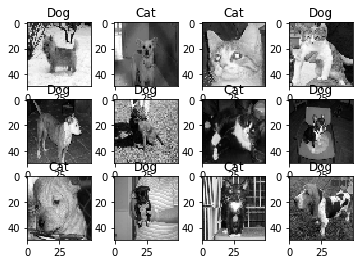

In [16]:
import matplotlib.pyplot as plt

figs = plt.figure()
for num,data in enumerate(test_data_g[:12]):
    test_img = data[0]
    test_lable = data[1]
    test_img_feed = test_img.reshape(IMAGE_SIZE,IMAGE_SIZE,1)
    t = figs.add_subplot(3,4,num+1)
    ores = test_img
    model_pred = model.predict([test_img_feed])[0]
    if np.argmax(model_pred) == 1:
        pred_val = "Dog"
    else:
        pred_val = "Cat"
        
    t.imshow(ores,cmap="gray")
    plt.title(pred_val)
    

## Saving the prediction file for Dogness

In [18]:
with open("C:/Grewe/Classes/CS663/Mat/JupyterNotebook/example 3/TrainingData/"+"final_results(dogs).csv",mode="w") as f:
    f.write("id,pred \n")
    
with open("C:/Grewe/Classes/CS663/Mat/JupyterNotebook/example 3/TrainingData/"+"final_results.csv(dogs)",mode="a") as r:
    for data in tqdm(test_data_g):
        img_class = data[1]
        img = data[0]
        imgs = img.reshape((IMAGE_SIZE,IMAGE_SIZE,1))
        model_out = model.predict([imgs])[0]
        r.write("{},{} \n".format(img_class,model_out[1]))
        
    


 17%|█████████████                                                               | 2143/12500 [00:07<00:46, 224.42it/s]


 32%|███████████████████████▉                                                    | 3943/12500 [00:14<00:21, 397.05it/s]


 52%|███████████████████████████████████████▌                                    | 6505/12500 [00:22<00:16, 367.27it/s]


 72%|██████████████████████████████████████████████████████▉                     | 9041/12500 [00:30<00:23, 146.90it/s]


 93%|█████████████████████████████████████████████████████████████████████▌     | 11593/12500 [00:37<00:02, 352.84it/s]


100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:40<00:00, 311.21it/s]